# AutoML Local Run Notebook

In [1]:
from azureml.core import Experiment
from ado_ai_utils.aml_configuration.utils import get_workspace_from_config
from ado_ai_utils.automl_utils import get_local_automl_config, get_or_create_local_run, get_run_data, \
    register_best_local_model
from ado_ai_utils.project_datasets import get_ai_feedback_sample
from ado_ai_utils.sklearn_utils import create_train_test_split, create_plots

WARNING - Warning: Falling back to use azure cli login credentials.
If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [2]:
workspace = get_workspace_from_config()

In [3]:
ai_impact_score_ds = get_ai_feedback_sample(workspace)

In [4]:
x_train, x_test, y_train, y_test = create_train_test_split(ai_impact_score_ds)

In [5]:
automl_config = get_local_automl_config(x_train, y_train)

WARNING - The AutoMLConfig inputs you have specified will soon be deprecated. Please use the AutoMLConfig shown in our documentation: https://aka.ms/AutoMLConfig


In [6]:
local_run = get_or_create_local_run(workspace, automl_config)        

In [7]:
run_data = get_run_data(local_run)

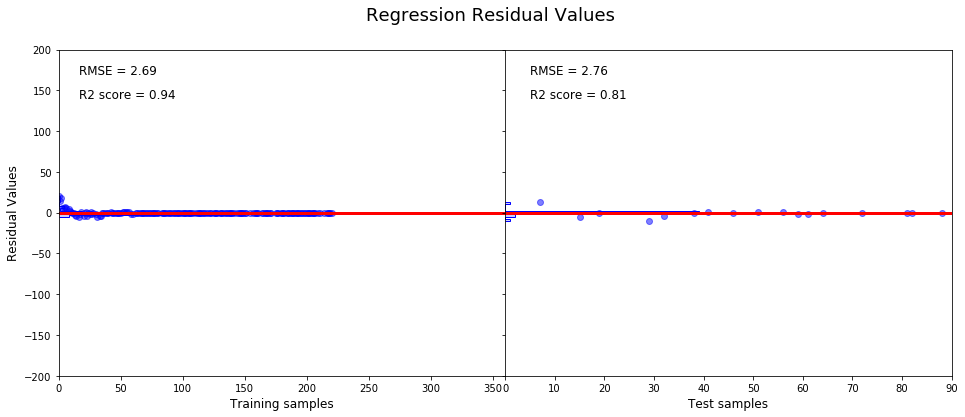

In [9]:
%matplotlib inline

create_plots(local_run, x_train, x_test, y_train, y_test)

In [10]:
register_best_local_model(local_run)

Registered model:
 --> Name: best_impact_score_model
 --> Version: 8
 --> URL: aml://asset/e23c9bce2f234cd0870ca4f9664dd812


Model(workspace=Workspace.create(name='dciborowws', subscription_id='0ca618d2-22a8-413a-96d0-0f1b531129c3', resource_group='dciborow-ado-test'), name=best_impact_score_model, id=best_impact_score_model:8, version=8, tags={}, properties={})